In [1]:
import navis 
import navis.interfaces.neuprint as neu
import neuprint as neu_orig
import NeuromodPlasticity as nmp 

import pathlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd

plt.rcParams['pdf.fonttype']=42

%load_ext autoreload
%autoreload 2 


%matplotlib inline

In [2]:
figfolder = pathlib.Path('/media/mplitt/SSD_storage/fig_scratch/EL_connectomics')
figfolder.mkdir(parents=True, exist_ok=True)


In [3]:
c = nmp.connectomics.npt_client()

In [4]:
eb, pb, gall, noduli = neu.fetch_roi("EB"), neu.fetch_roi("PB"), neu.fetch_roi("GA(R)"), neu.fetch_roi("NO")

In [5]:
ebcoords = nmp.connectomics.EBCoordinateSystem()

/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/connectomics.py:150: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=92). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  self._xsec_rad_spline = sp.interpolate.LSQBivariateSpline(eb_phase, xsec_phase, xsec_rad, knots, knots)


In [22]:
cmap = sns.color_palette(palette='hsv',as_cmap=True)
angle_2_color = lambda phase : cmap((phase+np.pi)/2/np.pi)

In [ ]:
# get all EPGs
epgs,_ = neu.queries.fetch_neurons(neu.NeuronCriteria(type='EPG'))

epgs.head()
post_avg_angle, color = [], []
for _, row in epgs.iloc[:].iterrows():
    postsynapses = neu.queries.fetch_synapse_connections(target_criteria=row['bodyId'],
                                                         source_criteria=None,
                                                         synapse_criteria=neu.queries.SynapseCriteria(type='post', rois=['EB']))
    syn_phase, syn_radius = ebcoords.get_circ_coordinates(ebcoords.change_of_basis(postsynapses[['x_post','y_post', 'z_post']].to_numpy()))
    avg_angle = np.angle(np.exp(1j*syn_phase).mean())
    post_avg_angle.append(avg_angle)
    color.append(angle_2_color(avg_angle))

epgs['post_avg_angle']=post_avg_angle
epgs['color']=color
# for each EPG
# get all synapse locations in EB
# calculate average phase of synapses
# set color based on average phase of synapses




  0%|          | 0/3764 [00:00<?, ?it/s]

  0%|          | 0/3426 [00:00<?, ?it/s]

  0%|          | 0/3928 [00:00<?, ?it/s]

  0%|          | 0/3872 [00:00<?, ?it/s]

  0%|          | 0/3395 [00:00<?, ?it/s]

  0%|          | 0/3427 [00:00<?, ?it/s]

  0%|          | 0/4385 [00:00<?, ?it/s]

  0%|          | 0/3612 [00:00<?, ?it/s]

  0%|          | 0/2803 [00:00<?, ?it/s]

  0%|          | 0/2939 [00:00<?, ?it/s]

  0%|          | 0/3063 [00:00<?, ?it/s]

  0%|          | 0/3167 [00:00<?, ?it/s]

  0%|          | 0/3772 [00:00<?, ?it/s]

  0%|          | 0/3335 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/3560 [00:00<?, ?it/s]

  0%|          | 0/3151 [00:00<?, ?it/s]

  0%|          | 0/3684 [00:00<?, ?it/s]

  0%|          | 0/2821 [00:00<?, ?it/s]

  0%|          | 0/2612 [00:00<?, ?it/s]

  0%|          | 0/2805 [00:00<?, ?it/s]

  0%|          | 0/3385 [00:00<?, ?it/s]

  0%|          | 0/3695 [00:00<?, ?it/s]

  0%|          | 0/2989 [00:00<?, ?it/s]

  0%|          | 0/3088 [00:00<?, ?it/s]

  0%|          | 0/3188 [00:00<?, ?it/s]

  0%|          | 0/3815 [00:00<?, ?it/s]

  0%|          | 0/3743 [00:00<?, ?it/s]

  0%|          | 0/2673 [00:00<?, ?it/s]

  0%|          | 0/3721 [00:00<?, ?it/s]

  0%|          | 0/3743 [00:00<?, ?it/s]

  0%|          | 0/2895 [00:00<?, ?it/s]

  0%|          | 0/2773 [00:00<?, ?it/s]

  0%|          | 0/2604 [00:00<?, ?it/s]

  0%|          | 0/2945 [00:00<?, ?it/s]

  0%|          | 0/3424 [00:00<?, ?it/s]

  0%|          | 0/3463 [00:00<?, ?it/s]

  0%|          | 0/4564 [00:00<?, ?it/s]

  0%|          | 0/3453 [00:00<?, ?it/s]

  0%|          | 0/3727 [00:00<?, ?it/s]

  0%|          | 0/2798 [00:00<?, ?it/s]

  0%|          | 0/3244 [00:00<?, ?it/s]

  0%|          | 0/3069 [00:00<?, ?it/s]

  0%|          | 0/2598 [00:00<?, ?it/s]

  0%|          | 0/4746 [00:00<?, ?it/s]

  0%|          | 0/3747 [00:00<?, ?it/s]

In [24]:
els, _ = neu.queries.fetch_neurons(neu.NeuronCriteria(type = 'EL'))
post_avg_angle, color = [], []
for _, row in els.iloc[:].iterrows():
    postsynapses = neu.queries.fetch_synapse_connections(target_criteria=row['bodyId'],
                                                         source_criteria=None,
                                                         synapse_criteria=neu.queries.SynapseCriteria(type='post', rois=['EB']))
    syn_phase, syn_radius = ebcoords.get_circ_coordinates(ebcoords.change_of_basis(postsynapses[['x_post','y_post', 'z_post']].to_numpy()))
    avg_angle = np.angle(np.exp(1j*syn_phase).mean())
    post_avg_angle.append(avg_angle)
    color.append(angle_2_color(avg_angle))

els['post_avg_angle']=post_avg_angle
els['color']=color

  0%|          | 0/4362 [00:00<?, ?it/s]

  0%|          | 0/4990 [00:00<?, ?it/s]

  0%|          | 0/4750 [00:00<?, ?it/s]

  0%|          | 0/4123 [00:00<?, ?it/s]

  0%|          | 0/4324 [00:00<?, ?it/s]

  0%|          | 0/3747 [00:00<?, ?it/s]

  0%|          | 0/4055 [00:00<?, ?it/s]

  0%|          | 0/3772 [00:00<?, ?it/s]

  0%|          | 0/4013 [00:00<?, ?it/s]

  0%|          | 0/3725 [00:00<?, ?it/s]

  0%|          | 0/4595 [00:00<?, ?it/s]

  0%|          | 0/3844 [00:00<?, ?it/s]

  0%|          | 0/4120 [00:00<?, ?it/s]

  0%|          | 0/4112 [00:00<?, ?it/s]

  0%|          | 0/3887 [00:00<?, ?it/s]

  0%|          | 0/3844 [00:00<?, ?it/s]

  0%|          | 0/3873 [00:00<?, ?it/s]

  0%|          | 0/4105 [00:00<?, ?it/s]

Fetching:   0%|          | 0/18 [00:00<?, ?it/s]

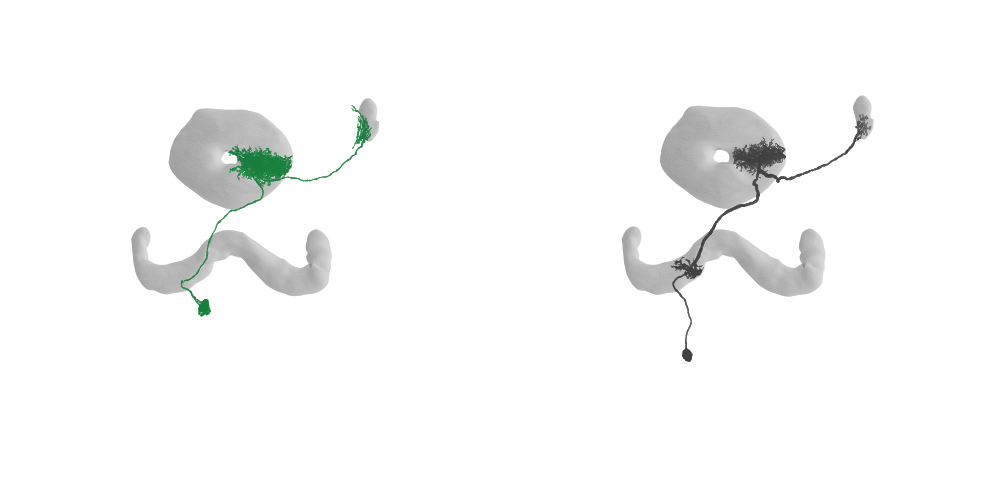

In [ ]:
# plot single EL and single EPG
el_skeletons = neu.fetch_skeletons(els['bodyId'])
fig = plt.figure(figsize=(10, 10))
ax = [fig.add_subplot(121, projection='3d')]
ax.append(fig.add_subplot(122, projection='3d'))


    
    # colors.append((0, 1, 0))
for a in ax:
    _ = navis.plot2d(
                    [ eb, pb, gall],
                    method="3d",
                    connectors=False,
                    linewidth=1.5,  # Make neuron a bit thinner to emphasize the synapses
                    view=("-x", "z"),
                    alpha=.4,
                    ax = a,
                )
    

_ = navis.plot2d(
                [neu.fetch_skeletons(epgs.iloc[0]['bodyId']), *el_skeletons[:1]],
                method="3d",
                connectors=False,
                linewidth=1.5,  # Make neuron a bit thinner to emphasize the synapses
                view=("-x", "z"),
                alpha=(0,1.),
                color=((plt.get_cmap('Greys')(0.8)),(plt.get_cmap('Greens')(0.8))),
                ax = ax[0],
                radius=True,
            )

_ = navis.plot2d(
                [neu.fetch_skeletons(epgs.iloc[0]['bodyId'])],
                method="3d",
                connectors=False,
                linewidth=1.5,  # Make neuron a bit thinner to emphasize the synapses
                view=("-x", "z"),
                alpha=1.,
                color=((plt.get_cmap('Greys')(0.8))),
                ax = ax[1],
                radius=True,
            )


ax[0].elev = -20
ax[1].elev = -20
ax[0].grid(False)
ax[0].set_axis_off()
ax[1].grid(False)
ax[1].set_axis_off()
# ax[0].elev = -20
# ax[0].set_xlim(ax[1].get_xlim())
# ax[0].set_ylim(ax[1].get_ylim())
# ax[0].set_zlim(ax[1].get_zlim())

plt.tight_layout()
fig.savefig(figfolder / f'example_el_epg.png', bbox_inches='tight', dpi=1000)



# plot whole population of ELs and EPGs



In [25]:
epg_skeletons = neu.fetch_skeletons(epgs['bodyId'])
el_skeletons = neu.fetch_skeletons(els['bodyId'])

Fetching:   0%|          | 0/46 [00:00<?, ?it/s]

Fetching:   0%|          | 0/18 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/46 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/18 [00:00<?, ?it/s]

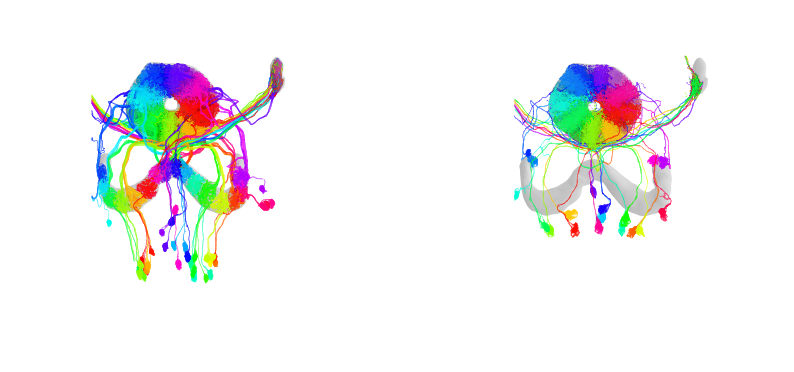

In [38]:
fig = plt.figure(figsize=(10, 10))
ax = [fig.add_subplot(121, projection='3d')]
ax.append(fig.add_subplot(122, projection='3d'))

    

    
    # colors.append((0, 1, 0))
for a in ax:
    _ = navis.plot2d(
                    [ eb, pb, gall],
                    method="3d",
                    connectors=False,
                    view=("-x", "z"),
                    alpha=.3,
                    ax = a,
                )
    

_ = navis.plot2d(
                [*epg_skeletons[:]],
                method="3d_complex",
                connectors=False,
                # linewidth=.5,  # Make neuron a bit thinner to emphasize the synapses
                view=("-x", "z"),
                alpha=(.7),
                color=epgs['color'].to_list(),
                ax = ax[0],
                radius=True,
            )

_ = navis.plot2d(
                [*el_skeletons],
                method="3d_complex",
                connectors=False,
                # linewidth=.5,  # Make neuron a bit thinner to emphasize the synapses
                view=("-x", "z"),
                alpha=(.7),
                color=els['color'].to_list(),
                ax = ax[1],
                radius=True,
)

ax[0].elev = -20
ax[1].elev = -20
ax[0].grid(False)
ax[0].set_axis_off()
ax[1].grid(False)
ax[1].set_axis_off()
ax[0].set_zlim([5000,24000])
ax[0].set_xlim([13000, 35000])
ax[0].set_box_aspect((1,1,1))
ax[1].set_zlim([5000,24000])
ax[1].set_xlim([13000, 35000])
ax[1].set_box_aspect((1,1,1))
fig.savefig(figfolder / f'all_el_epg.png', dpi=1000)
# ax[0].set_autoscale_on(True)

Fetching:   0%|          | 0/4 [00:00<?, ?it/s]

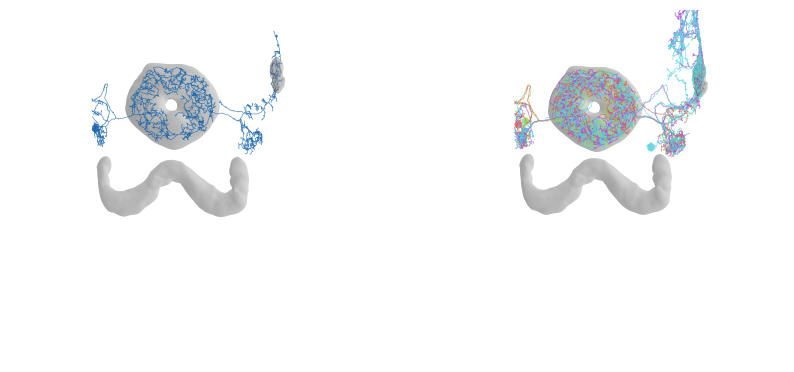

In [ ]:
exr2s,_ = neu.queries.fetch_neurons(neu.NeuronCriteria(type='ExR2'))
exr2_skeletons = neu.fetch_skeletons(exr2s['bodyId'])

fig = plt.figure(figsize=(10, 10))
ax = [fig.add_subplot(121, projection='3d')]
ax.append(fig.add_subplot(122, projection='3d'))


    
    # colors.append((0, 1, 0))
for a in ax:
    _ = navis.plot2d(
                    [ eb, pb, gall],
                    method="3d",
                    connectors=False,
                    linewidth=1.5,  # Make neuron a bit thinner to emphasize the synapses
                    view=("-x", "z"),
                    alpha=.4,
                    ax = a,
                )
    

_ = navis.plot2d(
                [exr2_skeletons[:1]],
                method="3d",
                connectors=False,
                linewidth=.5,  # Make neuron a bit thinner to emphasize the synapses
                view=("-x", "z"),
                alpha=(.7),
                color=(plt.get_cmap('Blues')(0.8)),
                ax = ax[0],
                radius=True,
            )

_ = navis.plot2d(
                exr2_skeletons,
                method="3d",
                connectors=False,
                linewidth=.5,  # Make neuron a bit thinner to emphasize the synapses
                view=("-x", "z"),
                alpha=(.7),
                # color=(plt.get_cmap('Blues')(0.8)),
                ax = ax[1],
                radius=True,
                )

ax[0].elev = -20
ax[1].elev = -20
ax[0].grid(False)
ax[0].set_axis_off()
ax[1].grid(False)
ax[1].set_axis_off()
ax[0].set_zlim([5000,24000])
ax[0].set_xlim([13000, 35000])
ax[0].set_box_aspect((1,1,1))
ax[1].set_zlim([5000,24000])
ax[1].set_xlim([13000, 35000])
ax[1].set_box_aspect((1,1,1))

fig.savefig(figfolder / 'exr2_skeletons.png', dpi=1000)

  0%|          | 0/641 [00:00<?, ?it/s]

  0%|          | 0/301 [00:00<?, ?it/s]

  0%|          | 0/586 [00:00<?, ?it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 0/644 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

  0%|          | 0/575 [00:00<?, ?it/s]

  0%|          | 0/273 [00:00<?, ?it/s]

  0%|          | 0/592 [00:00<?, ?it/s]

  0%|          | 0/348 [00:00<?, ?it/s]

  0%|          | 0/454 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

  0%|          | 0/453 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

  0%|          | 0/536 [00:00<?, ?it/s]

  0%|          | 0/255 [00:00<?, ?it/s]

  0%|          | 0/532 [00:00<?, ?it/s]

  0%|          | 0/279 [00:00<?, ?it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

  0%|          | 0/258 [00:00<?, ?it/s]

  0%|          | 0/573 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/207 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/269 [00:00<?, ?it/s]

  0%|          | 0/577 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

  0%|          | 0/413 [00:00<?, ?it/s]

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 0/477 [00:00<?, ?it/s]

  0%|          | 0/282 [00:00<?, ?it/s]

  0%|          | 0/457 [00:00<?, ?it/s]

  0%|          | 0/260 [00:00<?, ?it/s]

  0%|          | 0/494 [00:00<?, ?it/s]

  0%|          | 0/308 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/199 [00:00<?, ?it/s]

  0%|          | 0/351 [00:00<?, ?it/s]

  0%|          | 0/222 [00:00<?, ?it/s]

  0%|          | 0/305 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/399 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/317 [00:00<?, ?it/s]

  0%|          | 0/202 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/356 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/240 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

  0%|          | 0/267 [00:00<?, ?it/s]

  0%|          | 0/167 [00:00<?, ?it/s]

  0%|          | 0/377 [00:00<?, ?it/s]

  0%|          | 0/167 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/284 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/291 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/242 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/217 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/288 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/266 [00:00<?, ?it/s]

  0%|          | 0/194 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/173 [00:00<?, ?it/s]

  0%|          | 0/249 [00:00<?, ?it/s]

  0%|          | 0/203 [00:00<?, ?it/s]

  0%|          | 0/290 [00:00<?, ?it/s]

  0%|          | 0/202 [00:00<?, ?it/s]

  0%|          | 0/308 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

  0%|          | 0/290 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/282 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/371 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/244 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/241 [00:00<?, ?it/s]

  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/307 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/257 [00:00<?, ?it/s]

  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/330 [00:00<?, ?it/s]

  0%|          | 0/171 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

  0%|          | 0/222 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/286 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/141 [00:00<?, ?it/s]

  0%|          | 0/239 [00:00<?, ?it/s]

  0%|          | 0/239 [00:00<?, ?it/s]

  0%|          | 0/405 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/411 [00:00<?, ?it/s]

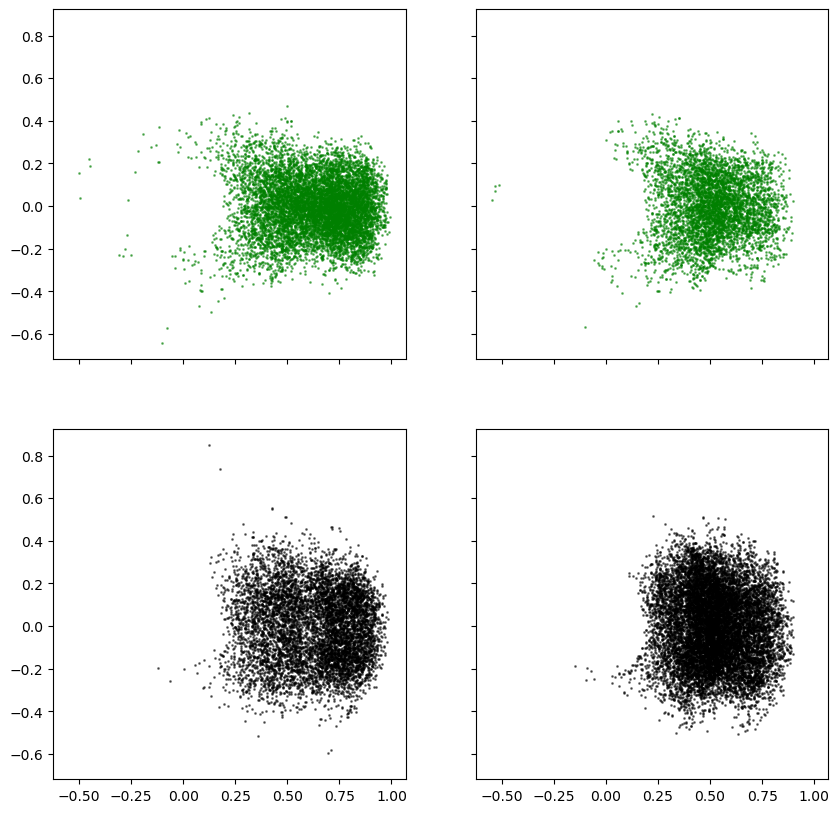

In [19]:
def scale_rotate_synapse_type(bodyId, type):
    postsynapses = neu.queries.fetch_synapse_connections(target_criteria=bodyId, source_criteria=neu.queries.NeuronCriteria(type=type), synapse_criteria=neu.queries.SynapseCriteria(type = 'post', rois=['EB']))
    postsynapses[['eb_x', 'eb_y', 'eb_z']] = eb_change_of_basis(postsynapses[['x_post', 'y_post', 'z_post']])
    postsynapses['phase'] = np.arctan2(postsynapses['eb_y'], postsynapses['eb_x'])
    postsynapses['radius'] = np.sqrt(postsynapses['eb_x']**2 + postsynapses['eb_y']**2)
    postsynapses['scaled_radius'] = scale_radius(postsynapses['phase'], postsynapses['radius'])
    # postsynapses['scaled_height'] = scale_height(postsynapses['phase'], postsynapses['eb_z'])
    postsynapses['rad_scaled_x'] = np.cos(postsynapses['phase']) * postsynapses['scaled_radius']
    postsynapses['rad_scaled_y'] = np.sin(postsynapses['phase']) * postsynapses['scaled_radius']
    postsynapses['rad_scaled_z'] = postsynapses['eb_z']

    avg_angle = np.angle(np.exp(1j*postsynapses['phase']).mean())

    rotated_synapes = (np.array([[np.cos(avg_angle), -1*np.sin(avg_angle), 0],
              [np.sin(avg_angle), np.cos(avg_angle), 0],
              [0, 0, 1]]).T @ postsynapses[['rad_scaled_x', 'rad_scaled_y', 'rad_scaled_z']].values.T).T
    
    postsynapses['rotated_x'] = rotated_synapes[:, 0]
    postsynapses['rotated_y'] = rotated_synapes[:, 1]
    postsynapses['rotated_z'] = rotated_synapes[:, 2]
    postsynapses['rotated_phase'] = np.arctan2(rotated_synapes[:, 1], rotated_synapes[:, 0])
    return postsynapses

# for each el
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
el_epg_synapses, el_pen_synapses = [], []
for i, el in els_df.iloc[:].iterrows():
    epg_postsynapses = scale_rotate_synapse_type(el['bodyId'], 'EPG')
    el_epg_synapses.append(epg_postsynapses)
    pen_postsynapses = scale_rotate_synapse_type(el['bodyId'], 'PEN_a.*')
    el_pen_synapses.append(pen_postsynapses)

    

    # ax[0].scatter(epg_rotated_synapses[:, 0], epg_rotated_synapses[:, 1], c=np.arctan2(epg_rotated_synapses[:,0], epg_rotated_synapses[:,1]), s=1, alpha=0.5, cmap='hsv', vmin=-np.pi, vmax=np.pi)
    # ax[1].scatter(pen_rotated_synapses[:,0], pen_rotated_synapses[:, 1], c=np.arctan2(pen_rotated_synapses[:,0], pen_rotated_synapses[:,1]), s=1, alpha=0.5, cmap='hsv', vmin=-np.pi, vmax=np.pi)
    ax[0,0].scatter(epg_postsynapses['rotated_x'], epg_postsynapses['rotated_y'], color='green', s=1, alpha=0.5)
    ax[0,1].scatter(pen_postsynapses['rotated_x'], pen_postsynapses['rotated_y'], color='green', s=1, alpha=0.5)
    # print(rotated_synapes)
el_epg_synapses = pd.concat(el_epg_synapses)
el_pen_synapses = pd.concat(el_pen_synapses)




epgs_df, _ = neu.queries.fetch_neurons(neu.NeuronCriteria(type = 'EPG'))
epg_epg_synapses, epg_pen_synapses = [], []
# fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
for i, epg in epgs_df.iloc[:].iterrows():
    epg_postsynapses = scale_rotate_synapse_type(epg['bodyId'], 'EPG')
    epg_epg_synapses.append(epg_postsynapses)
    pen_postsynapses = scale_rotate_synapse_type(epg['bodyId'], 'PEN_a.*')
    epg_pen_synapses.append(pen_postsynapses)

    
    # ax[0].scatter(epg_rotated_synapses[:, 0], epg_rotated_synapses[:, 1], c=np.arctan2(epg_rotated_synapses[:,0], epg_rotated_synapses[:,1]), s=1, alpha=0.5, cmap='hsv', vmin=-np.pi, vmax=np.pi)
    # ax[1].scatter(pen_rotated_synapses[:,0], pen_rotated_synapses[:, 1], c=np.arctan2(pen_rotated_synapses[:,0], pen_rotated_synapses[:,1]), s=1, alpha=0.5, cmap='hsv', vmin=-np.pi, vmax=np.pi)
    ax[1,0].scatter(epg_postsynapses['rotated_x'], epg_postsynapses['rotated_y'], color='black', s=1, alpha=0.5)
    ax[1,1].scatter(pen_postsynapses['rotated_x'], pen_postsynapses['rotated_y'], color='black', s=1, alpha=0.5)

epg_epg_synapses = pd.concat(epg_epg_synapses)
epg_pen_synapses = pd.concat(epg_pen_synapses)



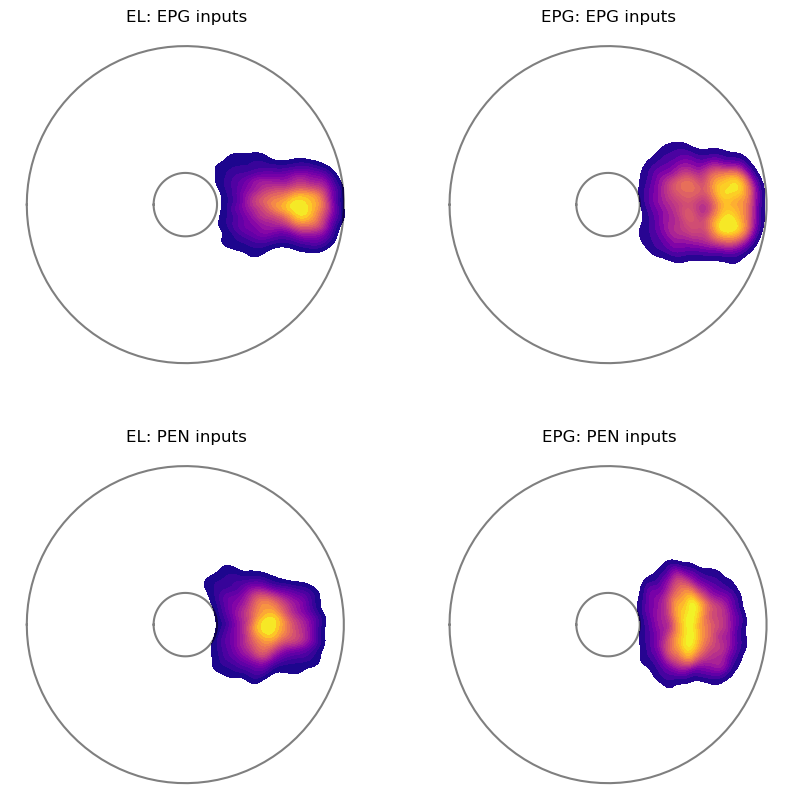

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
l = 20
sns.kdeplot(
    el_epg_synapses,
    x='rotated_x',
    y='rotated_y',
    ax=ax[0,0],
    cmap='plasma',
    # color='green',
    levels=l,
    fill=True,
)
ax[0,0].set_title('EL: EPG inputs')

sns.kdeplot(
    epg_epg_synapses,
    x='rotated_x',
    y='rotated_y',
    ax=ax[0,1],
    cmap='plasma',
    # color='black',
    # linewidth=0,
    levels=l,
    fill=True,
   

)
ax[0,1].set_title('EPG: EPG inputs')

sns.kdeplot(
    el_pen_synapses,
    x='rotated_x',
    y='rotated_y',
    ax=ax[1,0],
    cmap='plasma',
    # color='green',
    levels=l,
    fill=True,
  
)
ax[1,0].set_title('EL: PEN inputs')

sns.kdeplot(
    epg_pen_synapses,
    x='rotated_x',
    y='rotated_y',
    ax=ax[1,1],
    cmap='plasma',
    # color='black',
    # linewidth=0,
    levels=l,
    fill=True,

)
ax[1,1].set_title('EPG: PEN inputs')

min_rad = .2
max_rad = 1.
angles = np.linspace(-np.pi, np.pi, num=100)
for a in ax.flatten():

    a.plot(np.cos(angles) * min_rad, np.sin(angles) * min_rad, color='black', alpha=0.5)
    a.plot(np.cos(angles) * max_rad, np.sin(angles) * max_rad, color='black', alpha=0.5)
    # a.set_xlim(-max_rad, max_rad)
    # a.set_ylim(-max_rad, max_rad)
   
    a.set_aspect('equal')
    a.grid(False)
    a.set_axis_off()
    # a.plot(np.cos(angles) * min_rad, np.sin(angles) * min_rad, color='black', alpha=0.5)
    # a.plot(np.cos(angles) * max_rad, np.sin(angles) * max_rad, color='black', alpha=0.5)

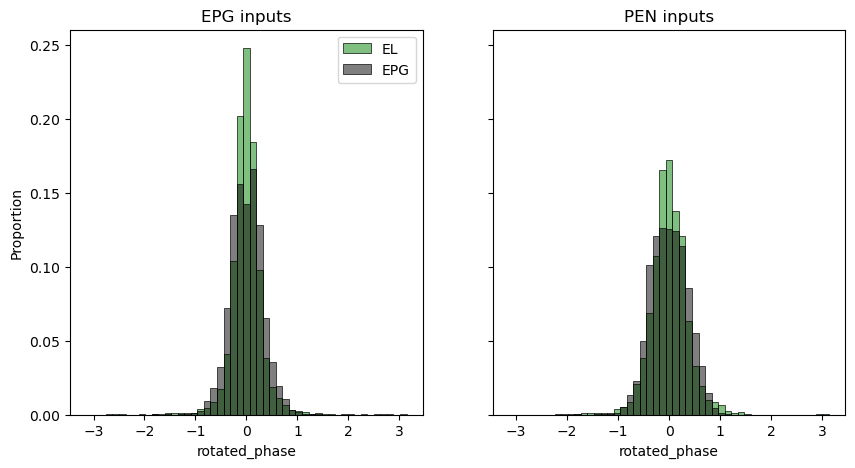

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
commmon_args = {
    'stat': 'proportion',
    'bins': np.linspace(-np.pi, np.pi, num=50),
    # 'levels': 10,
    'fill': True,
    'alpha': 0.5,
}
sns.histplot(
    el_epg_synapses,
    x='rotated_phase',
    ax=ax[0],
    color='green',
    label='EL',
    **commmon_args,
)

sns.histplot(
    epg_epg_synapses,
    x='rotated_phase',
    ax=ax[0],
    color='black',
    label='EPG',
    **commmon_args,
)

sns.histplot(
    el_pen_synapses,
    x='rotated_phase',
    ax=ax[1],
    color='green',
    **commmon_args,
)
sns.histplot(    
    epg_pen_synapses,
    x='rotated_phase',
    ax=ax[1],
    color='black',
    **commmon_args,
)

ax[0].set_title('EPG inputs')
ax[1].set_title('PEN inputs')
ax[0].legend()


In [249]:
#  for each EL, get adjacency matrix of EPGs and PENs
nrn_df, conn_df = neu.queries.fetch_adjacencies( sources = neu.NeuronCriteria(type = ['EPG', 'PEN_a.*', 'PEN_b.*',]),
                                                    targets = els_df['bodyId'],
                                                    rois=['EB'],
                                                    min_total_weight=3,
                                                    )
conn_df = neu_orig.utils.merge_neuron_properties(nrn_df, conn_df, properties=['instance'])
conn_df.head()

conn_mat = neu_orig.utils.connection_table_to_matrix(conn_df, group_cols=['instance_pre', 'bodyId_post'], weight_col='weight')

In [250]:
order = ['EPG(PB08)_L1', 'EPG(PB08)_L2', 'EPG(PB08)_L3', 'EPG(PB08)_L4', 'EPG(PB08)_L5', 'EPG(PB08)_L6', 'EPG(PB08)_L7', 'EPG(PB08)_L8',
         'EPG(PB08)_R8', 'EPG(PB08)_R7', 'EPG(PB08)_R6', 'EPG(PB08)_R5', 'EPG(PB08)_R4', 'EPG(PB08)_R3', 'EPG(PB08)_R2', 'EPG(PB08)_R1',
         'PEN_a(PB06a)_L2', 'PEN_a(PB06a)_L3', 'PEN_a(PB06a)_L4', 'PEN_a(PB06a)_L5', 'PEN_a(PB06a)_L6', 'PEN_a(PB06a)_L7', 'PEN_a(PB06a)_L8', 'PEN_a(PB06a)_L9',
         'PEN_a(PB06a)_R9', 'PEN_a(PB06a)_R8', 'PEN_a(PB06a)_R7', 'PEN_a(PB06a)_R6', 'PEN_a(PB06a)_R5', 'PEN_a(PB06a)_R4', 'PEN_a(PB06a)_R3', 'PEN_a(PB06a)_R2',
         ]

epg_order = order[:16]
pen_order = order[16:]

# find avg angle of each el
avg_angles = []
for i, el in els_df.iloc[:].iterrows():
    _synapses = el_epg_synapses[el_epg_synapses['bodyId_post'] == el['bodyId']]
    print(_synapses.shape)
    avg_angles.append(np.angle(np.exp(1j*_synapses['phase'].values).mean()))

avg_angles = np.array(avg_angles)
el_order = els_df['bodyId'].values[np.argsort(avg_angles)]
print(el_order)


conn_mat = conn_mat.reindex(pen_order[:8], axis=0).reindex(columns=np.roll(el_order, 4))

(641, 25)
(586, 25)
(644, 25)
(575, 25)
(592, 25)
(454, 25)
(453, 25)
(536, 25)
(532, 25)
(435, 25)
(573, 25)
(498, 25)
(504, 25)
(577, 25)
(413, 25)
(477, 25)
(457, 25)
(494, 25)
[ 696682163  725951660  820144012  725942718  912596952 1192152791
 1036753721 1321140852 1066088381 1508369047 1137288015 1168340507
 1292882359 1005308608 1447253749 1167965225  727350004 1034220115]


<Axes: xlabel='instance_pre', ylabel='bodyId_post'>

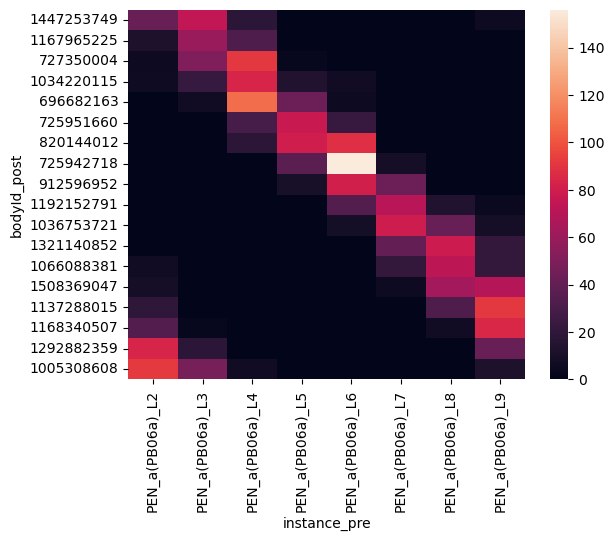

In [251]:

sns.heatmap(conn_mat.T)
# sort bodyId by avg angle

# find closest el to EPGL1, 
    # shift el order to start with closest el


<Axes: xlabel='instance_pre', ylabel='bodyId_post'>

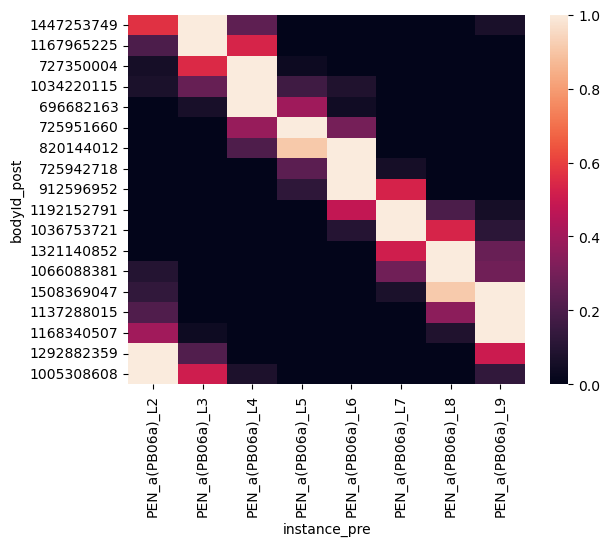

In [252]:
el_conn_mat_norm = conn_mat.apply(lambda x: x/np.amax(x), axis=0)

sns.heatmap(el_conn_mat_norm.T)

In [253]:
el_conn_mat_norm.head()

bodyId_post,1447253749,1167965225,727350004,1034220115,696682163,725951660,820144012,725942718,912596952,1192152791,1036753721,1321140852,1066088381,1508369047,1137288015,1168340507,1292882359,1005308608
instance_pre,,,,,,,,,,,,,,,,,,
PEN_a(PB06a)_L2,0.567568,0.200000,0.054945,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.09589,0.130435,0.208791,0.400000,1.000000,1.000000
PEN_a(PB06a)_L3,1.000000,1.000000,0.549451,0.261905,0.064815,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.035294,0.214286,0.510870
PEN_a(PB06a)_L4,0.243243,0.533333,1.000000,1.000000,1.000000,0.376623,0.204545,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.076087
PEN_a(PB06a)_L5,0.000000,0.000000,0.032967,0.166667,0.398148,1.000000,0.909091,0.237179,0.123457,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
PEN_a(PB06a)_L6,0.000000,0.000000,0.000000,0.083333,0.046296,0.298701,1.000000,1.000000,1.000000,0.478873,0.101266,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


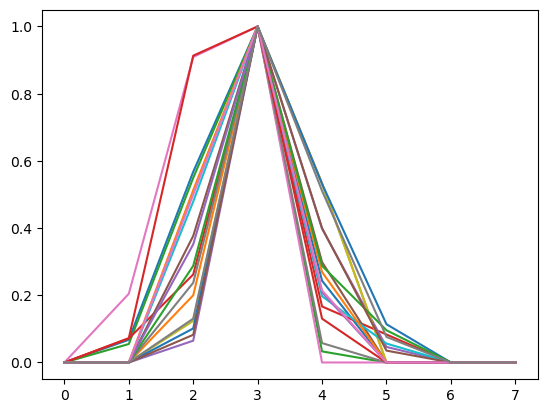

In [254]:
fig, ax = plt.subplots()
for i, conn in el_conn_mat_norm.T.iterrows():
    # np.argmax(conn.values)
    ax.plot(np.roll(conn.values,-np.argmax(conn.values)+3), label=i)
    # ax.plot(np.sort(conn.values)[::-1])

    # plt.figure(figsize=(10, 5))
    # sns.heatmap(conn.values.reshape(2, 16), cmap='plasma', cbar=False)
    # plt.title(i)
    # plt.savefig(figfolder / f'conn_{i}.pdf', bbox_inches='tight')
    # plt.close()

<Axes: xlabel='instance_pre', ylabel='instance_post'>

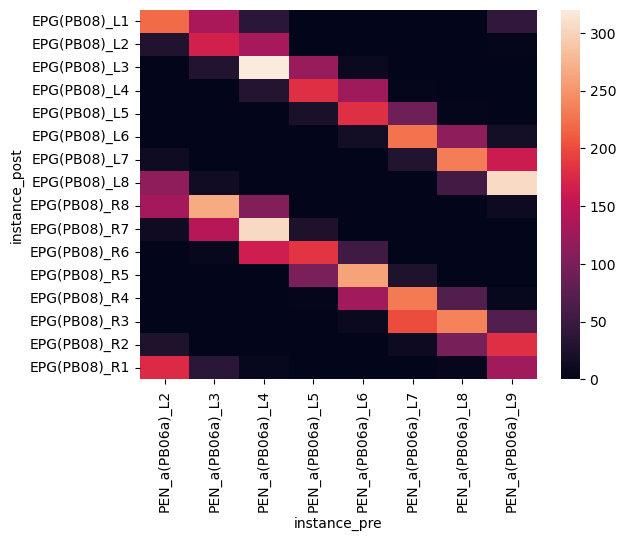

In [255]:
#  for each EL, get adjacency matrix of EPGs and PENs
nrn_df, conn_df = neu.queries.fetch_adjacencies( sources = neu.NeuronCriteria(type = ['EPG', 'PEN_a.*', 'PEN_b.*',]),
                                                    targets = epgs_df['bodyId'],
                                                    rois=['EB'],
                                                    min_total_weight=3,
                                                    )
conn_df = neu_orig.utils.merge_neuron_properties(nrn_df, conn_df, properties=['instance'])
conn_df.head()

conn_mat = neu_orig.utils.connection_table_to_matrix(conn_df, group_cols=['instance_pre', 'instance_post'], weight_col='weight')
conn_mat = conn_mat.reindex(pen_order[:8], axis=0).reindex(columns=epg_order[:])
sns.heatmap(conn_mat.T)

<Axes: xlabel='instance_pre', ylabel='instance_post'>

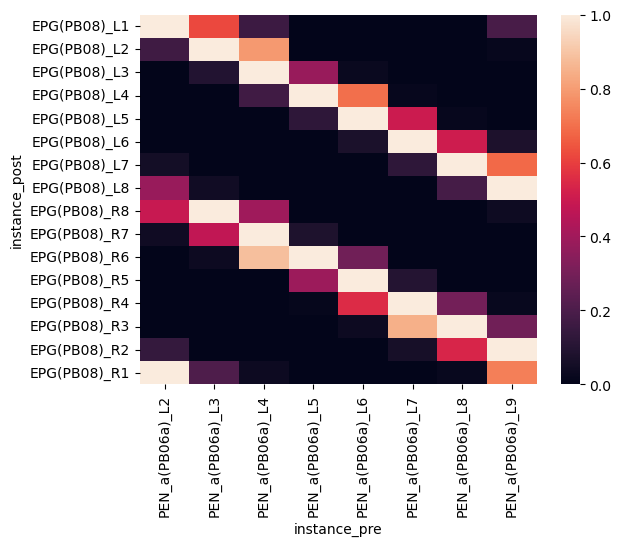

In [256]:
epg_conn_mat_norm = conn_mat.apply(lambda x: x/np.amax(x), axis=0)

sns.heatmap(epg_conn_mat_norm.T)

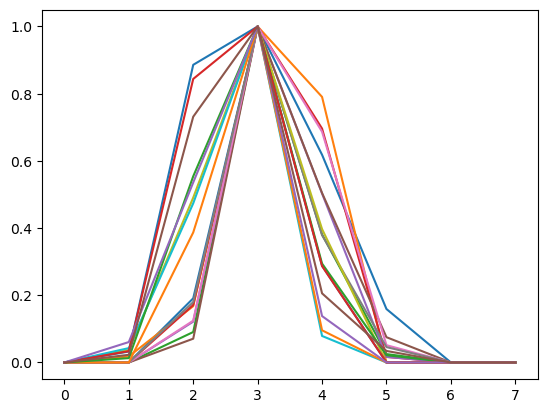

In [257]:
fig, ax = plt.subplots()
for i, conn in epg_conn_mat_norm.T.iterrows():
    # np.argmax(conn.values)
    ax.plot(np.roll(conn.values,-np.argmax(conn.values)+3), label=i)

# fig, ax = plt.subplots()
# for i, conn in conn_mat_norm.iterrows():
#     ax.plot(np.sort(conn.values)[::-1])


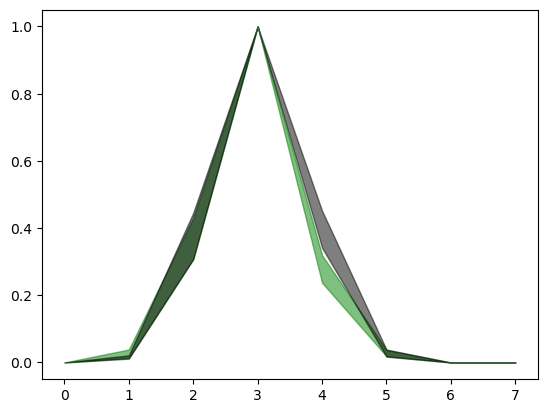

In [258]:
fig, ax = plt.subplots()
el_ = []
for i, conn in el_conn_mat_norm.T.iterrows():
    # np.argmax(conn.values)
    # ax.plot(np.roll(conn.values,-np.argmax(conn.values)+3), color='green')
    el_.append(np.roll(conn.values,-np.argmax(conn.values)+3))
el_ = np.array(el_)
mu, sem = el_.mean(axis=0), sp.stats.sem(el_, axis=0)
ax.fill_between(range(len(mu)), mu-sem, mu+sem, color='green', alpha=0.5, label='EL')

epg_ = []
for i, conn in epg_conn_mat_norm.T.iterrows():
    # np.argmax(conn.values)
    # ax.plot(np.roll(conn.values,-np.argmax(conn.values)+3), color='black')
    epg_.append(np.roll(conn.values,-np.argmax(conn.values)+3))
epg_ = np.array(epg_)
mu, sem = epg_.mean(axis=0), sp.stats.sem(epg_, axis=0)
ax.fill_between(range(len(mu)), mu-sem, mu+sem, color='black', alpha=0.5, label='EPG')